# Tymoteusz Skórka 39432

## Potrzebne biblioteki

In [67]:
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
# plt.rcParams['figure.figsize'] = [10, 5]

## 1. Zastosuj do podanych plików źródłowych [1], [2] odpowiednie odpowiedzi impulsowe–splot sygnału i odpowiedzi impulsowej (wyznacz sygnał z pogłosem). Zwróć uwagę, na zgodność parametrów plików (liczba kanałów, częstotliwość próbkowania) i w razie potrzeby dokonaj konwersji do wspólnego formatu.

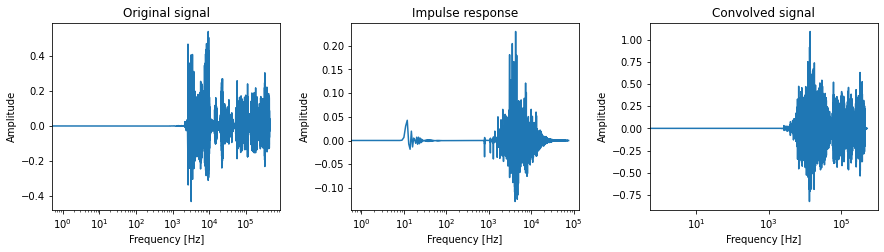

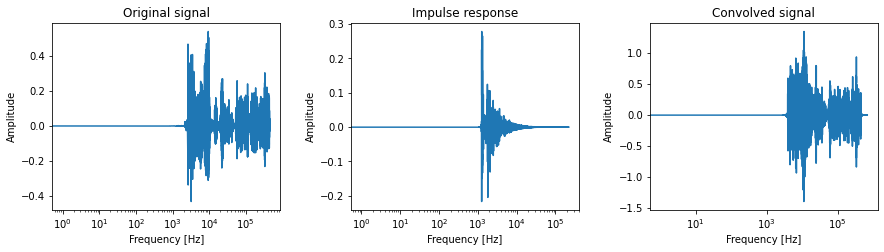

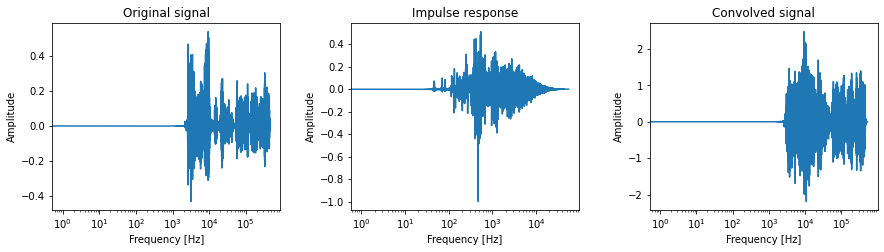

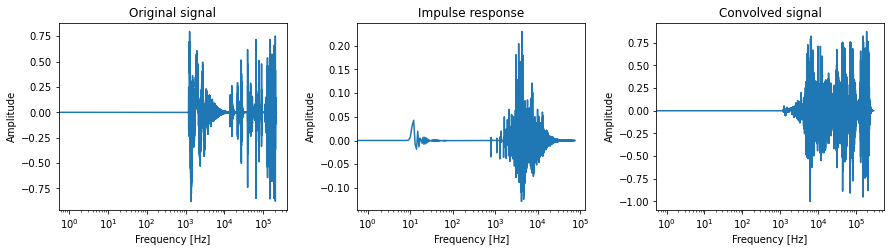

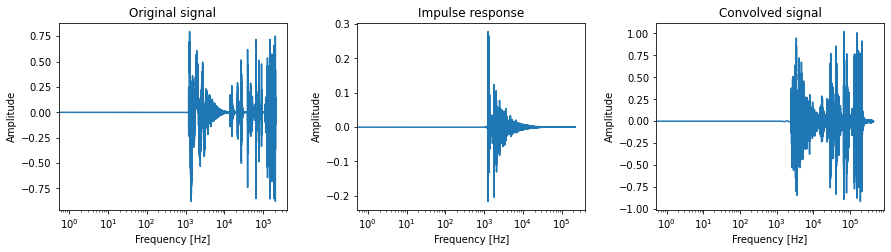

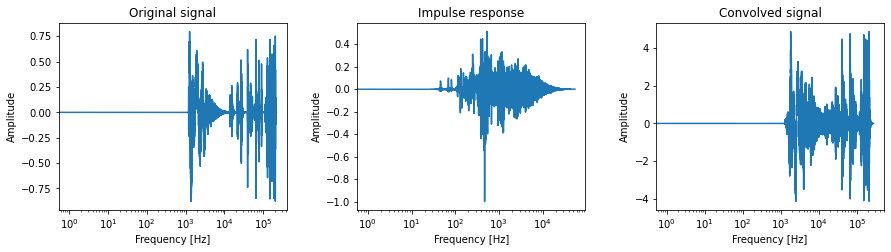

In [68]:
def apply_impulse_and_save(orig_signal, impulse, fs, fname):
    fig, ax = plt.subplots(1, 3, figsize=(13, 4))
    fig.tight_layout(pad=4.0)
    ax[0].plot(orig_signal)
    ax[0].set_xlabel("Frequency [Hz]")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_xscale('log')
    ax[0].set_title("Original signal")
    
    ax[1].plot(impulse)
    ax[1].set_xlabel("Frequency [Hz]")
    ax[1].set_ylabel("Amplitude")
    ax[1].set_xscale('log')
    ax[1].set_title("Impulse response")
    
    signal_convolved = signal.convolve(orig_signal, impulse)
    ax[2].plot(signal_convolved)
    ax[2].set_xlabel("Frequency [Hz]")
    ax[2].set_ylabel("Amplitude")
    ax[2].set_xscale('log')
    ax[2].set_title("Convolved signal")
    plt.show()
    sf.write(fname, signal_convolved, fs)
    return signal_convolved




# 44100 Hz fs, 16 bit resolution
fs = 44100
sig1, _ = librosa.load('data/signal1.wav', sr=44100) 
sig2, _ = librosa.load('data/signal2.wav', sr=44100) 

imp1, _ = librosa.load('data/impulse1.wav', sr=44100)
imp2, _ = librosa.load('data/impulse2.wav', sr=44100)
imp3, _ = librosa.load('data/impulse3.wav', sr=44100)


signal_convolved11 = apply_impulse_and_save(sig1, imp1, fs, 'data/splot11.wav')
signal_convolved12 = apply_impulse_and_save(sig1, imp2, fs, 'data/splot12.wav')
signal_convolved13 = apply_impulse_and_save(sig1, imp3, fs, 'data/splot13.wav')

signal_convolved21 = apply_impulse_and_save(sig2, imp1, fs, 'data/splot21.wav')
signal_convolved22 = apply_impulse_and_save(sig2, imp2, fs, 'data/splot22.wav')
signal_convolved23 = apply_impulse_and_save(sig2, imp3, fs, 'data/splot23.wav')


## Wyznacz spektrogramy sygnałów źródłowych i sygnałów z pogłosem

################################## Dla sygnału pierwszego ########################################


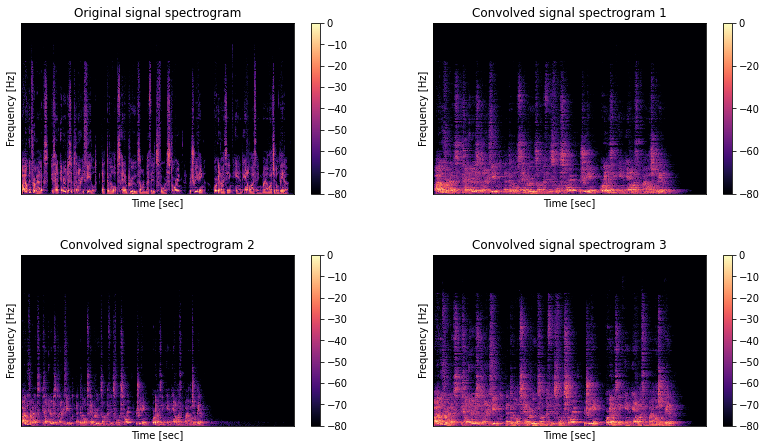

################################## Dla sygnału drugiego ########################################


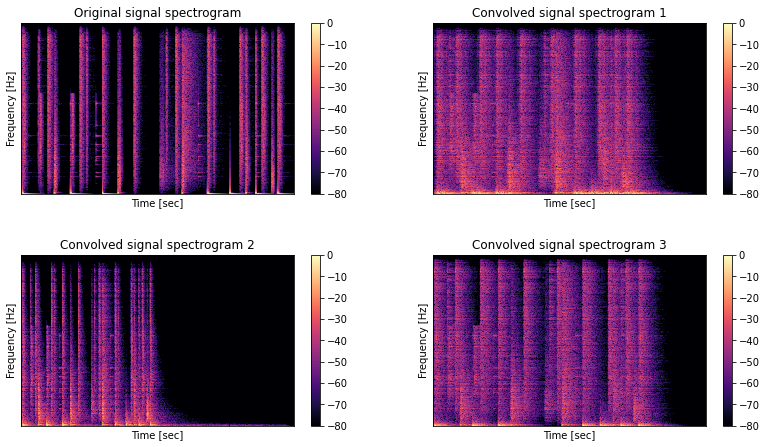

In [69]:
def plot_spectograms(original_signal, signal_convolved1, signal_convolved2, signal_convolved3, fs):
    fig, ax = plt.subplots(2, 2, figsize=(12, 7))
    fig.tight_layout(pad=4.0)
    
    D = librosa.stft(original_signal)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    img = librosa.display.specshow(S_db, sr=fs, ax=ax[0, 0])
    fig.colorbar(img, ax=ax[0, 0])
    ax[0, 0].set_title("Original signal spectrogram")
    ax[0, 0].set_ylabel('Frequency [Hz]')
    ax[0, 0].set_xlabel('Time [sec]')
    
    
    D2 = librosa.stft(signal_convolved1)
    S_db2 = librosa.amplitude_to_db(np.abs(D2), ref=np.max)
    
    img2 = librosa.display.specshow(S_db2, sr=fs, ax=ax[0, 1])
    fig.colorbar(img2, ax=ax[0, 1])
    ax[0, 1].set_title("Convolved signal spectrogram 1")
    ax[0, 1].set_ylabel('Frequency [Hz]')
    ax[0, 1].set_xlabel('Time [sec]')
    
    D3 = librosa.stft(signal_convolved2)
    S_db3 = librosa.amplitude_to_db(np.abs(D3), ref=np.max)
    img3 = librosa.display.specshow(S_db3, sr=fs, ax=ax[1, 0])
    fig.colorbar(img3, ax=ax[1, 0])
    ax[1, 0].set_title("Convolved signal spectrogram 2")
    ax[1, 0].set_ylabel('Frequency [Hz]')
    ax[1, 0].set_xlabel('Time [sec]')
    
    D4 = librosa.stft(signal_convolved3)
    S_db4 = librosa.amplitude_to_db(np.abs(D4), ref=np.max)
    img4 = librosa.display.specshow(S_db4, sr=fs, ax=ax[1, 1])
    fig.colorbar(img4, ax=ax[1, 1])
    ax[1, 1].set_title("Convolved signal spectrogram 3")
    ax[1, 1].set_ylabel('Frequency [Hz]')
    ax[1, 1].set_xlabel('Time [sec]')
    plt.show()
    
    f, t, Sxx_orig = signal.spectrogram(original_signal, fs)
    f, t, Sxx_conv1 = signal.spectrogram(signal_convolved1, fs)
    f, t, Sxx_conv2 = signal.spectrogram(signal_convolved2, fs)
    f, t, Sxx_conv3 = signal.spectrogram(signal_convolved3, fs)
    return Sxx_orig, Sxx_conv1, Sxx_conv2, Sxx_conv3

print("################################## Dla sygnału pierwszego ########################################")
Sxx_orig1, Sxx_conv11, Sxx_conv12, Sxx_conv13 = plot_spectograms(sig1, signal_convolved11, signal_convolved12, signal_convolved13, fs)
print("################################## Dla sygnału drugiego ########################################")
Sxx_orig2, Sxx_conv21, Sxx_conv22, Sxx_conv23 = plot_spectograms(sig2, signal_convolved21, signal_convolved22, signal_convolved23, fs)

## Porównaj spektrogramy z pogłosem ze spektrogramami sygnałów źródłowych. Wyznacz błąd średniokwadratowy pomiędzy spektrogramami właściwymi parami spektrogramów w pasmach oktawowych.

################################## Dla sygnału pierwszego ########################################
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 1 Oktawa nr 0: 6.502047044490315e-18
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 0: 1.1172286364232465e-15
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 0: 1.6763376947459106e-16
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 1 Oktawa nr 1: 5.119226631533444e-15
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 1: 2.0003262693293117e-13
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 1: 1.743161480050201e-13
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 1 Oktawa nr 2: 1.7117440456796305e-13
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 2: 2.484783300850978e-12
MSE pomiędzy spectrograme

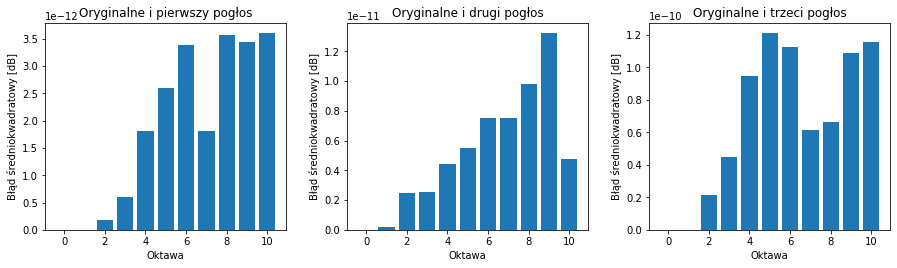

################################## Dla sygnału drugiego ########################################
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 1 Oktawa nr 0: 1.8511966804850292e-17
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 0: 1.309085590119735e-17
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 0: 6.643201936596868e-17
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 1 Oktawa nr 1: 1.1965392511068906e-15
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 1: 2.5710752813301236e-15
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 1: 6.750479209261177e-16
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 1 Oktawa nr 2: 5.235019728039634e-13
MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr 2: 1.0391564348855854e-13
MSE pomiędzy spectrogramem 

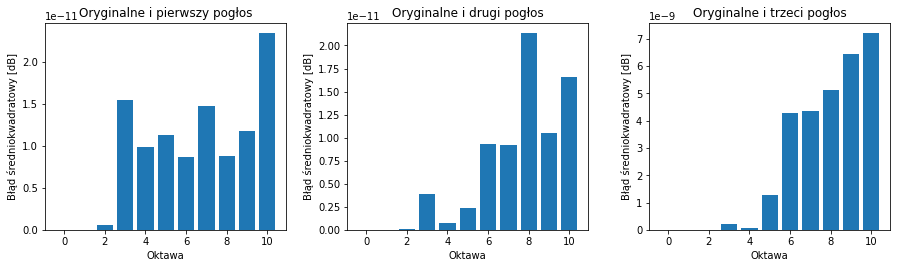

In [70]:
def calculate_mse_octave(spect_orig, spect_convolved1, spect_convolved2, spect_convolved3, fs):
    fcentre  = np.ceil(10**3 * (2 ** (np.arange(-18,13, 3)/3)))
    fcentre[1] += 0.5
    fd = 2**(1/2)
    fupper = np.round(fcentre * fd, 1)
    flower = np.round(fcentre / fd, 1)
    mses1 = list()
    mses2 = list()
    mses3 = list()
    i = 0
    for lower,upper in zip(flower, fupper):
        sos = signal.butter( N=4, Wn=np.array([ lower, 
        upper])/fs, btype='bandpass', analog=False, 
        output='sos');
        w, h = signal.sosfreqz(sos)
        filteredSignal = signal.sosfiltfilt(sos, spect_orig)
        filteredSignal_convolved1 = signal.sosfiltfilt(sos, spect_convolved1)
        filteredSignal_convolved2 = signal.sosfiltfilt(sos, spect_convolved2)
        filteredSignal_convolved3 = signal.sosfiltfilt(sos, spect_convolved3)
        sh1 = filteredSignal.shape[1]
        
        diff1 = np.hstack((filteredSignal - filteredSignal_convolved1[:, :sh1], -filteredSignal_convolved1[:, sh1:]))
        diff2 = np.hstack((filteredSignal - filteredSignal_convolved2[:, :sh1], -filteredSignal_convolved2[:, sh1:]))
        diff3 = np.hstack((filteredSignal - filteredSignal_convolved3[:, :sh1], -filteredSignal_convolved3[:, sh1:]))
        mses1.append(np.mean(np.power(diff1, 2)))
        mses2.append(np.mean(np.power(diff2, 2)))
        mses3.append(np.mean(np.power(diff3, 2)))
        print(f'MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 1 Oktawa nr {i}: {mses1[i]}')
        print(f'MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr {i}: {mses2[i]}')
        print(f'MSE pomiędzy spectrogramem sygnału oryginalnego i sygnału z pogłosem nr 2 Oktawa nr {i}: {mses3[i]}')
        i+=1
    
    fig, ax = plt.subplots(1, 3, figsize=(13, 4))
    fig.tight_layout(pad=3.0)
    
    ax[0].bar(np.arange(11), mses1)
    ax[0].set_xlabel("Oktawa")
    ax[0].set_ylabel("Błąd średniokwadratowy [dB]")
    ax[0].set_title(f"Oryginalne i pierwszy pogłos")
    
    ax[1].bar(np.arange(11), mses2)
    ax[1].set_xlabel("Oktawa")
    ax[1].set_ylabel("Błąd średniokwadratowy [dB]")
    ax[1].set_title(f"Oryginalne i drugi pogłos")
    
    ax[2].bar(np.arange(11), mses3)
    ax[2].set_xlabel("Oktawa")
    ax[2].set_ylabel("Błąd średniokwadratowy [dB]")
    ax[2].set_title(f"Oryginalne i trzeci pogłos")
    plt.show()


print("################################## Dla sygnału pierwszego ########################################")
calculate_mse_octave(Sxx_orig1, Sxx_conv11, Sxx_conv12, Sxx_conv13, fs)


print("################################## Dla sygnału drugiego ########################################")
calculate_mse_octave(Sxx_orig2, Sxx_conv21, Sxx_conv22, Sxx_conv23, fs)

## Wnioski

Po odsłuchaniu plików dźwiękowych z zastosowanymi odpowiedziami impulsowymi można rzeczywiście usłyszeć pogłos, dlatego tez eksperyment można uznać za udany. Dodatkowo mozna zaobserwować, że dźwięki z pogłosem mają znacznie bogatsze spectrogramy.